In [72]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline 
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore')
loan_data= pd.read_csv(r'C:\loan\loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_data.shape

(39717, 111)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


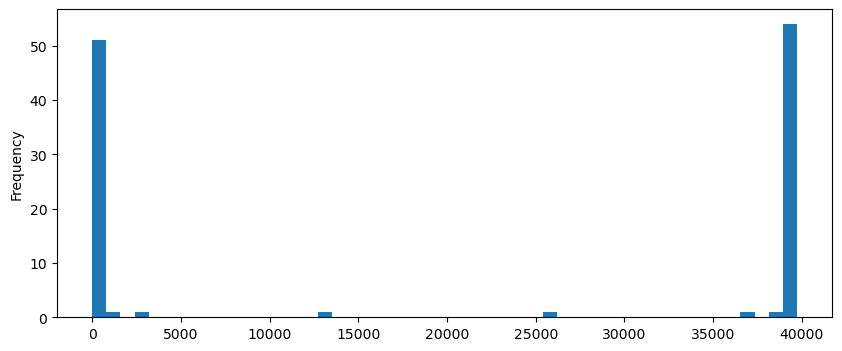

In [10]:
#Let us do some cleanup of NULLs from rows and columns of the loan dataframe
clean_data = loan_data.isnull().sum()
clean_data.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

In [11]:
# We can clearly see that there is a huge spike towards the 40K mark. The total records in our data is 39,717. 
clean_data.loc[(clean_data.values > 10000) & (clean_data.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [12]:
loan_data.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan_data.shape

(39717, 53)

In [13]:
#looking for unique column if any 
loan_column_unique = loan_data.nunique()
print(loan_column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [14]:
c1 = loan_column_unique[loan_column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [15]:
#drop column with values=1
loan_data.drop(columns = list(c1.index), inplace=True)
loan_data.shape

(39717, 44)

In [16]:
#fields like id, member_id & url are different for each application.. Therefore, let us drop all these columns mentioned below
drop_columns = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_data.drop(columns=drop_columns, inplace=True)
loan_data.shape

(39717, 28)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0


In [33]:
#now considering term column and how it can help to take our decision 
loan_data['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [34]:
loan_data['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [35]:
#removing %
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:>

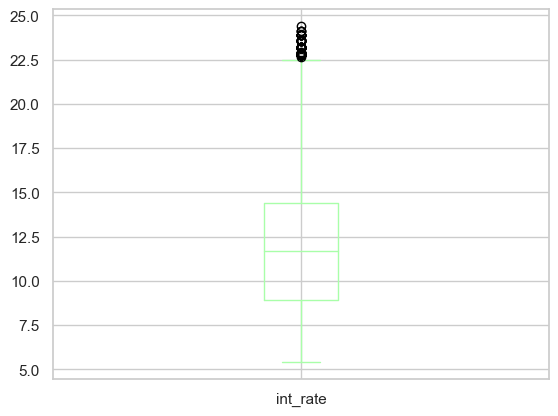

In [36]:
loan_data['int_rate'].plot.box()

In [38]:
#analysing grade columnn
loan_data['grade'].value_counts()
loan_data['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [41]:
print(loan_data['emp_title'].value_counts().head())
loan_data['emp_title'].unique().shape

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64


(28028,)

In [42]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [43]:
loan_data['emp_length'].isnull().sum()

1033

In [44]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'loan_status_num'],
      dtype='object', length=112)

In [45]:
loan_data['home_ownership'].value_counts()
loan_data['verification_status'].value_counts()
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [46]:
#date column split to mont and year
m, y = loan_data['issue_d'].str.split('-').str

In [47]:
y.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [48]:
# Now  new column like issued_y and issued_m added which will be useful for our further analysis and drop this issue_d column
loan_data['issue_y'] = pd.to_numeric(y)
loan_data['issue_m'] = m
loan_data.drop(columns=['issue_d'], inplace=True)

In [50]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_num,issue_y,issue_m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,11,Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec


In [51]:
loan_data['purpose'].value_counts()
loan_data['title'].head(10)
loan_data['title'].sample(10)

8562          Consolidation Loan
29718                $8,000 Loan
2916                  Truck Loan
13814    Debt Consolidation Loan
1505       Home Improvement Loan
27560                 regal loan
24058         Just a Little Help
9770          Debt consoladation
13340         Debt Consolidation
26326                  Back Pay 
Name: title, dtype: object

In [52]:
#since we have cleaned data set and have parameters for our EDA. let's proceed with EDA¶
#Univariate Analysis

#Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_data['loan_status_num'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_num,issue_y,issue_m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,11,Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec


(38577, 113)

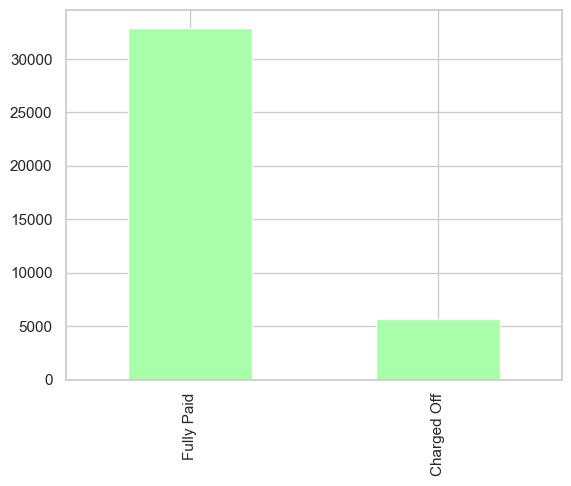

In [53]:
# univariate analysis analyzing data where we analyze each variable individually. For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable. Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

#Target Variable
#We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

#The frequency table of a variable will give us the count of each category in that variable.

loan_data['loan_status'].value_counts()
loan_data['loan_status'].value_counts(normalize=True)

loan_data['loan_status'].value_counts().plot.bar()

#Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense

loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data.shape

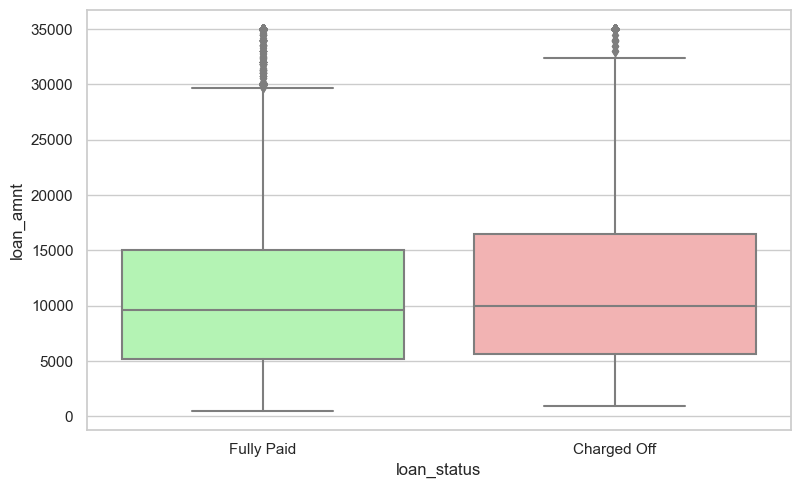

In [54]:
#Loan status vs Numerical continuous variables¶
#Let us now compare the loan_status fields with all the numerical variable. 

colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data)
plt.show()

In [56]:
#filter out data above 75% lan data
loan_data_above75 = loan_data.loc[(loan_data['loan_amnt']>=15000)]
loan_data_above75.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_num,issue_y,issue_m
20,1069740,1284848,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
21,1039153,1269083,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,11,Dec
25,1069697,1273773,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec
26,1069800,1304679,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,11,Dec
31,1069539,1304608,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,11,Dec


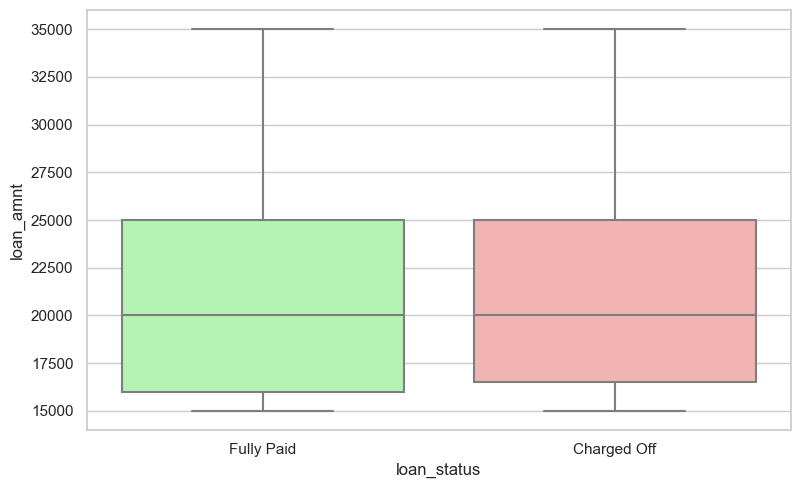

In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data_above75)
plt.show()

In [85]:
#from above box plot we can conclude that "heigher the amount" will tend to "Write off"

def PercentileCut (*, data=loan_data, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)
    
    
loan_data.columns




Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'loan_amnt_p', 'annual_inc_p'],
      dtype='object', length=113)

In [86]:
def Univariate_Categorical (*, data=loan_data, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan_data.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan_data.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

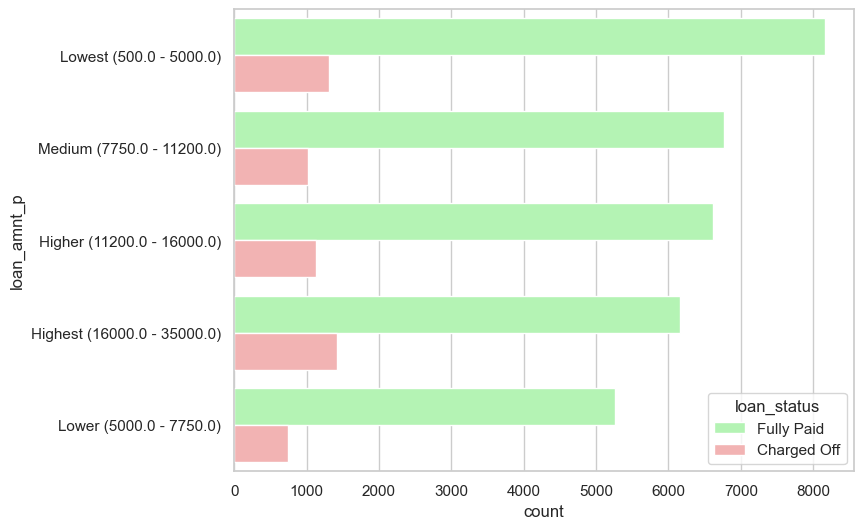

loan_amnt_p,Charged off %,Record count
Highest (16750.0 - 35000.0),0.175706,7928
Higher (12000.0 - 16750.0),0.144495,5668
Lowest (500.0 - 5000.0),0.137333,9568
Medium (8000.0 - 12000.0),0.129621,8764
Lower (5000.0 - 8000.0),0.123893,7789


In [81]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')



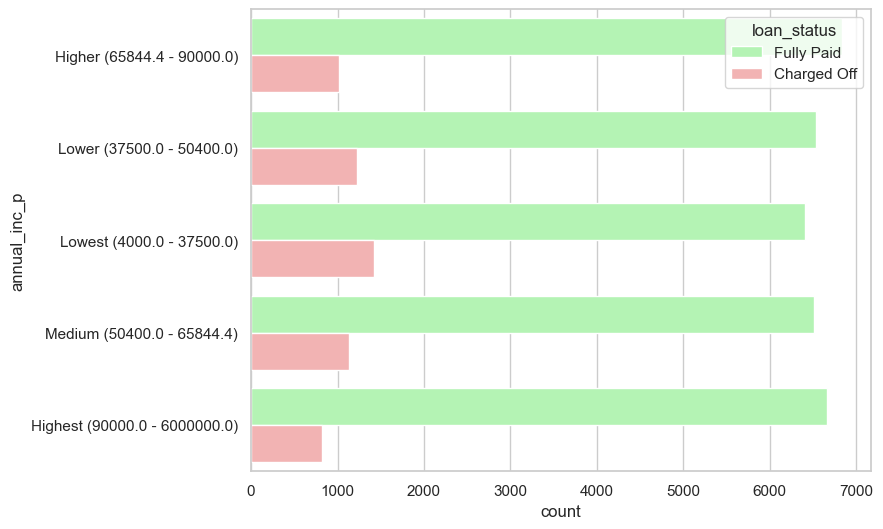

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37500.0),0.178692,7969
Lower (37500.0 - 50400.0),0.153875,7987
Medium (50400.0 - 65844.4),0.144145,7874
Higher (65844.4 - 90000.0),0.125553,8132
Highest (90000.0 - 6000000.0),0.105480,7755


In [87]:
# conclusion Higher the loan amount, greater the chance of the loan getting default.
#plot shows that higher installment amounts shows higher default percentages.


PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

In [ ]:
#conclution Higher the income hiegher the repayment %

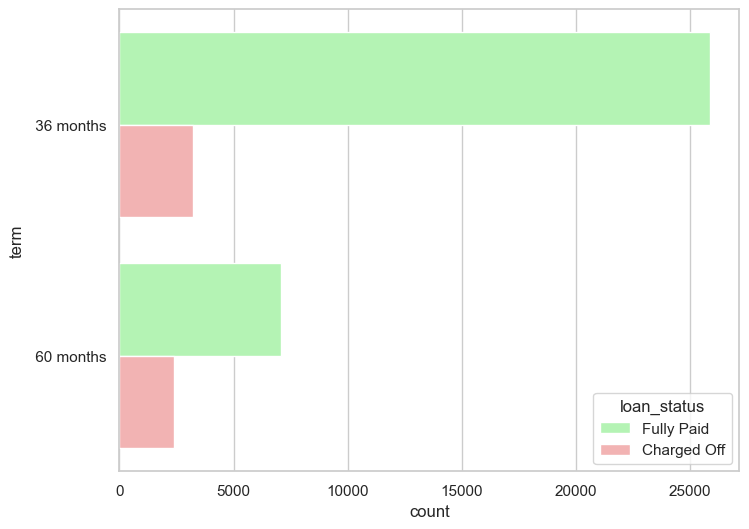

term,Charged off %,Record count
60 months,0.225967,10621
36 months,0.110909,29096


In [88]:
Univariate_Categorical(column='term')

In [89]:
 #5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases

In [95]:
#Bivariate Analysis
#Let’s recall some of the hypotheses that we generated earlier:

#Applicants with high incomes should have more chances of loan approval.
#Applicants who have repaid their previous debts should have higher chances of loan approval.
#Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
#Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
#Let’s try to test the above-mentioned hypotheses using bivariate analysis

#After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

#Categorical Independent Variable vs Target Variable

#First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans
#we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and and analyze their combined effect on the loan-status. These categories are based on our business understanding.

def Bivariate_Analysis (*, data=loan_data, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()
    
def Bivariate_Categorical (*, data=loan_data, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

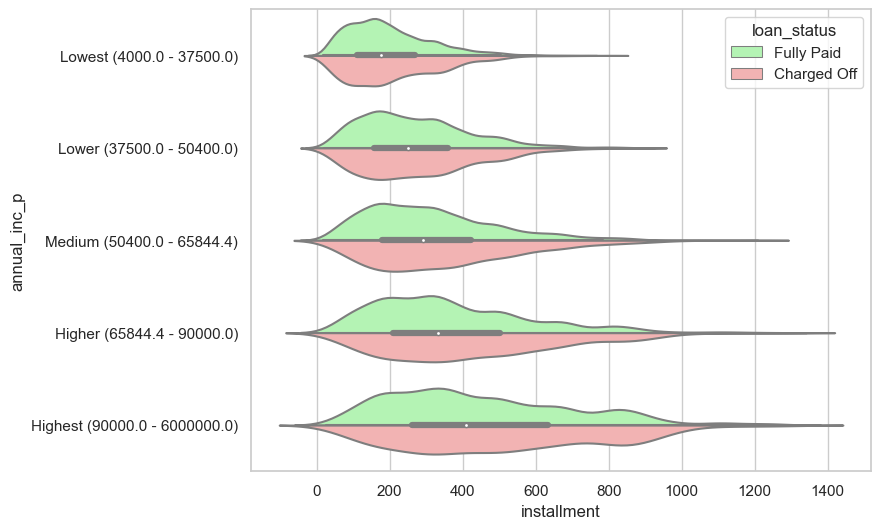

In [96]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

In [97]:
#Above figure shows that for higher installments for any income group have more number of defaults.
#impact are for defaulter
#Higher interest rate (above 13%)
#Higher revolving line utilization rate (above 58%)
#Repayment term (5 years)

#High loan amount & interest rate for lower income group
#High installment and longer repayment term

SyntaxError: invalid character '•' (U+2022) (4007274843.py, line 2)